# Udacity Data Science Nanodegree - project 1 Boston Kaggle Data

CRISP: Cross-Industry Process for Data Mining

This project follows the CRISP-DM Process. The process consists of 6 stages:

1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results
6. Deploy

## 1. Business Understanding

Airbnb is a popular platform among travelers. It is easy and convenient for tourists to rent a house, apartment, private room or shared room on the other side of the world.

It is also easy to rent a property through Airbnb. Therefore, many people see Airbnb as an opportunity to earn extra money. Those people may be interested what factors impact rental price most.

I analyzed Airbnb listings from the Kaggle Boston Airbnb Open Data: https://www.kaggle.com/datasets/airbnb/boston
        
When analyzing the data, I will answer three questions:
    1. Is price higher for a property with a host or without? Is it more profitable to rent the entire property?
    2. Which areas in Boston are most expensive?
    3. Which factors influence property price in Boston the most?

## 2. Data Understanding

#### Dowloading data

In order to use the Boston data from Kaggle I use API command to dowload data into Udacity workspace.

In [1]:
# !pip install kaggle

In [2]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/workspace/home"  # Adjust this path to where you uploaded kaggle.json

In [3]:
# import tqdm
# print(tqdm.__version__)

In [4]:
# !pip install --upgrade tqdm

In [5]:
# !kaggle datasets download -d airbnb/boston

In [6]:
# !unzip boston.zip

In [7]:
# !pip install --upgrade seaborn

In [8]:
#  import seaborn
#  print(seaborn.__version__)

Import necessary libraries.

To understand data better check columns and characteristics of a data

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from IPython import display

%matplotlib inline
import tqdm

pd.set_option('display.max_columns', 1000);

In [10]:
pwd

'/workspace/home'

In [11]:
# Import data
df_lis = pd.read_csv("./listings.csv")
df_cal = pd.read_csv("./calendar.csv")
df_re = pd.read_csv("./reviews.csv")

In [12]:
#number of rows and columns
df_lis.shape

(3585, 95)

In [13]:
# Look at columns
df_lis.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [14]:
df_lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [15]:
#columns connected with price
df_lis[['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']].head()

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,$250.00,NaN,NaN,NaN,$35.00,$0.00
1,$65.00,$400.00,NaN,$95.00,$10.00,$0.00
2,$65.00,$395.00,"$1,350.00",NaN,NaN,$20.00
3,$75.00,NaN,NaN,$100.00,$50.00,$25.00
4,$79.00,NaN,NaN,NaN,$15.00,$0.00


## 3. Prepare Data

In [16]:
# remove $ and comma signs from above columns, converting to float

col_price_list = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']


df_lis[col_price_list] = df_lis[col_price_list].replace({'\$': '', ',': ''}, regex=True)
df_lis[col_price_list] = df_lis[col_price_list].astype(float)
df_lis[col_price_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 6 columns):
price               3585 non-null float64
weekly_price        892 non-null float64
monthly_price       888 non-null float64
security_deposit    1342 non-null float64
cleaning_fee        2478 non-null float64
extra_people        3585 non-null float64
dtypes: float64(6)
memory usage: 168.1 KB


In [17]:
# Check missing values in price columns
def missing_val_ratio(df):
    ''' 
    INPUT  
        df - a dataframe

    OUTPUT 

        df_missings - a dataframe with the ratio of missing values for each column in the given dataframe
    ''' 
    ratio_missing = df.isna().sum()/len(df)
    df_missings = pd.DataFrame({'column_name': df.columns,
                                      'ratio_missing': ratio_missing})
    
    return df_missings

In [18]:
missing_val_ratio(df_lis[col_price_list])

,column_name,ratio_missing
price,price,0.000000
weekly_price,weekly_price,0.751185
monthly_price,monthly_price,0.752301
security_deposit,security_deposit,0.625662
cleaning_fee,cleaning_fee,0.308787
extra_people,extra_people,0.000000


There are no missing values in price column. Weekly_price, monthly_price, security deposit columns have more than 50% of missing data. Cleaning fee column has 31% of missing data. Extra people fee columns has no missing data.

In [19]:
# Price statistics
df_lis.describe().price

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

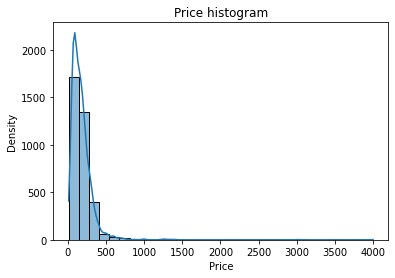

In [20]:
# Price histogram
sns.histplot(df_lis.price, bins=30, kde=True, edgecolor='black')

# Adding labels and title
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Price histogram')
plt.show() 

# If you get a error: AttributeError: module 'seaborn' has no attribute 'histplot', please upgrade seaborn and restart the kernel

In [21]:
# It seems that there are outliers in the dataset, let's have a closer look at those rows
print(sum(df_lis['price']<20), sum(df_lis['price']>600))

2 38


In [22]:
df_lis[ (df_lis['price'] < 20)]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
2033,13926201,https://www.airbnb.com/rooms/13926201,20160906204935,2016-09-07,MIT ROOM,"My place is close to Faneuil Hall Marketplace,...",NaN,"My place is close to Faneuil Hall Marketplace,...",none,NaN,NaN,NaN,NaN,NaN,NaN,https://a2.muscache.com/im/pictures/0045a3aa-4...,https://a2.muscache.com/im/pictures/0045a3aa-4...,https://a2.muscache.com/im/pictures/0045a3aa-4...,https://a2.muscache.com/im/pictures/0045a3aa-4...,82576049,https://www.airbnb.com/users/show/82576049,Tung,2016-07-08,"New York, New York, United States",NaN,within an hour,100%,100%,f,https://a2.muscache.com/im/pictures/3068501d-b...,https://a2.muscache.com/im/pictures/3068501d-b...,NaN,1,1,"['email', 'phone', 'google', 'kba']",t,t,"Boston, MA, United States",NaN,Downtown,NaN,Boston,MA,NaN,Boston,"Boston, MA",US,United States,42.360424,-71.061496,f,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{""Wireless Internet""}",NaN,10.0,NaN,NaN,NaN,NaN,1,0.0,1,1125,2 months ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN
3468,12736032,https://www.airbnb.com/rooms/12736032,20160906204935,2016-09-07,"Easy-Sunny, Apt BU/Coolidge Corner","Convenient and cozy. Apt is quiet, a short wal...",NaN,"Convenient and cozy. Apt is quiet, a short wal...",none,NaN,NaN,NaN,NaN,NaN,"Please, No shoes allowed. There's a mat for th...",https://a2.muscache.com/im/pictures/e1cffe2f-0...,https://a2.muscache.com/im/pictures/e1cffe2f-0...,https://a2.muscache.com/im/pictures/e1cffe2f-0...,https://a2.muscache.com/im/pictures/e1cffe2f-0...,18194953,https://www.airbnb.com/users/show/18194953,Natanya,2014-07-16,"Boston, Massachusetts, United States",Hello! I'm from NH. Lived abroad in Paris and...,within a day,90%,100%,f,https://a2.muscache.com/im/pictures/8fbe7e04-b...,https://a2.muscache.com/im/pictures/8fbe7e04-b...,NaN,1,1,"['email', 'phone', 'reviews']",t,f,"Walbridge Street, Boston, MA 02134, United States",NaN,Allston,NaN,Boston,MA,02134,Boston,"Boston, MA",US,United States,42.348018,-71.136071,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,Breakfas...",NaN,11.0,NaN,NaN,NaN,NaN,2,0.0,1,1125,6 weeks ago,NaN,0,0,0,2,2016-09-06,12,2016-05-14,2016-07-11,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,flexible,f,f,1,3.08


In [23]:
df_lis[ (df_lis['price'] > 600)]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
297,1628130,https://www.airbnb.com/rooms/1628130,20160906204935,2016-09-07,Rare! Pondside home-yours in July!,"Fully updated, spacious Victorian with modern ...","The house: it's got 4+ bedrooms, 3.5 updated b...","Fully updated, spacious Victorian with modern ...",none,"We love our home and community. It's a great, ...",NaN,The 39 bus goes from the end of our street int...,You'll have access to the entire house.,We'll appoint a friend to look out for you and...,Please treat our house as we'd treat yours: wi...,https://a2.muscache.com/im/pictures/2d910ae6-9...,https://a2.muscache.com/im/pictures/2d910ae6-9...,https://a2.muscache.com/im/pictures/2d910ae6-9...,https://a2.muscache.com/im/pictures/2d910ae6-9...,333220,https://www.airbnb.com/users/show/333220,Hylton,2011-01-02,"Boston, Massachusetts, United States","Live in Jamaica Plain, MA. Culture vulture int...",within a few hours,100%,60%,f,https://a2.muscache.com/im/users/333220/profil...,https://a2.muscache.com/im/users/333220/profil...,Jamaica Plain,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Holbrook Street, Boston, MA 02130, United States",Jamaica Plain,Jamaica Plain,NaN,Boston,MA,02130,Boston,"Boston, MA",US,United States,42.311712,-71.118184,t,House,Entire home/apt,10,3.5,4.0,7.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,750.0,3000.0,NaN,NaN,125.0,1,0.0,2,3,a week ago,NaN,0,0,0,0,2016-09-06,1,2016-07-23,2016-07-23,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,flexible,f,f,1,0.64
391,50032,https://www.airbnb.com/rooms/50032,20160906204935,2016-09-07,Amazing Design & Detail Throughout!,NaN,This home will exceed all your expectations! ...,This home will exceed all your expectations! ...,none,NaN,NaN,NaN,NaN,NaN,The cleaning fee only applies to stays under 4...,https://a2.muscache.com/im/pictures/287068/3cc...,https://a2.muscache.com/im/pictures/287068/3cc...,https://a2.muscache.com/im/pictures/287068/3cc...,https://a2.muscache.com/im/pictures/287068/3cc...,228845,https://www.airbnb.com/users/show/228845,Jeremy,2010-09-08,"Manchester-by-the-Sea, Massachusetts, United S...",Real Estate Investor,within a few hours,100%,56%,f,https://a1.muscache.com/im/users/228845/profil...,https://a1.muscache.com/im/users/228845/profil...,Jamaica Plain,5,5,"['email', 'phone', 'reviews']",t,f,"Centre St, Boston, MA 02130, United States",Jamaica Plain,Jamaica Plain,NaN,Boston,MA,02130,Boston,"Boston, MA",US,United States,42.315911,-71.112757,t,Apartment,Entire home/apt,12,2.0,4.0,5.0,Real Bed,"{""Cable TV"",""Wireless Internet"",""Air Condition...",2000.0,725.0,3400

There are outliers in price fee. Minimum price is 10$. Highest price per night is 4000. I remove rows with outliers from the dataset as results of a linear model can be skewed:
1. where price is lower than 20 
2. where price higher than 600

In [24]:
df_lis_nout = df_lis[ (df_lis['price'] >= 20) & (df_lis['price'] <= 600) ]

In [25]:
# Price statistics
df_lis_nout.describe().price

count    3545.000000
mean      165.116220
std       101.141245
min        20.000000
25%        85.000000
50%       149.000000
75%       219.000000
max       600.000000
Name: price, dtype: float64

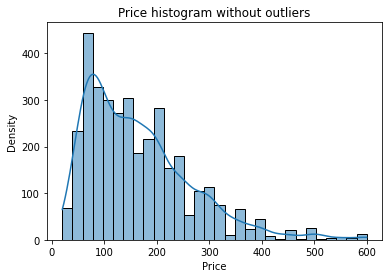

In [26]:
# Price histogram
sns.histplot(df_lis_nout.price, bins=30, kde=True, edgecolor='black')

# Adding labels and title
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Price histogram without outliers')
plt.show() 

# If you get a error: AttributeError: module 'seaborn' has no attribute 'histplot', please upgrade seaborn and restart the kernel

In [27]:
df_lis_nout.shape

(3545, 95)

In [28]:
#find columns which have only one value or ae unrelevant because each value in a column is different

def number_unique(df):
    ''' 
    INPUT  
        df - a dataframe
        
    OUTPUT 

        df_nunique - a dataframe with the number of missing values and number of unique for each column in the given dataframe
    ''' 
    df_nunique = []
    
    for col in df.columns:
        n_missing = np.sum(pd.isna(df[col]))
        n_unique = df[col].nunique()
        n_len = len(df)
        perc_missing = n_missing/n_len*100
        perc_unique = n_unique/n_len*100
        
        df_nunique.append([col, n_missing, n_unique, n_len, perc_missing, perc_unique])
        
    df_nunique = pd.DataFrame(df_nunique)
    df_nunique.columns = ['column_name','n_missing', 'n_unique', 'n_len', 'perc_missing', 'perc_unique']
    
    return df_nunique

In [29]:
#show columns with only unique values
a = number_unique(df_lis_nout)
a.query('n_missing == 0' and 'n_unique == 3545')

,column_name,n_missing,n_unique,n_len,perc_missing,perc_unique
0,id,0,3545,3545,0.0,100.0
1,listing_url,0,3545,3545,0.0,100.0
17,picture_url,0,3545,3545,0.0,100.0
48,latitude,0,3545,3545,0.0,100.0
49,longitude,0,3545,3545,0.0,100.0


In [30]:
for col in df_lis_nout.columns:
    if ('url') in col or ('id') in col:
        print(col)

id
listing_url
scrape_id
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_thumbnail_url
host_picture_url
host_identity_verified


In [31]:
df_lis_nout.loc[:,['id', 'listing_url', 'scrape_id', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'host_identity_verified']].head()

,id,listing_url,scrape_id,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_thumbnail_url,host_picture_url,host_identity_verified
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,f
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,t
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,https://a2.muscache.com/im/pictures/6ae8335d-9...,https://a2.muscache.com/im/pictures/6ae8335d-9...,https://a2.muscache.com/im/pictures/6ae8335d-9...,https://a2.muscache.com/im/pictures/6ae8335d-9...,16701,https://www.airbnb.com/users/show/16701,https://a2.muscache.com/im/users/16701/profile...,https://a2.muscache.com/im/users/16701/profile...,t
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,https://a2.muscache.com/im/pictures/39764190-1...,https://a2.muscache.com/im/pictures/39764190-1...,https://a2.muscache.com/im/pictures/39764190-1...,https://a2.muscache.com/im/pictures/39764190-1...,6031442,https://www.airbnb.com/users/show/6031442,https://a2.muscache.com/im/pictures/5d430cde-7...,https://a2.muscache.com/im/pictures/5d430cde-7...,f
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,https://a1.muscache.com/im/pictures/97154760/8...,https://a1.muscache.com/im/pictures/97154760/8...,https://a1.muscache.com/im/pictures/97154760/8...,https://a1.muscache.com/im/pictures/97154760/8...,15396970,https://www.airbnb.com/users/show/15396970,https://a0.muscache.com/im/users/15396970/prof...,https://a0.muscache.com/im/users/15396970/prof...,t


In [32]:
df_lis.host_identity_verified.value_counts()

t    2603
f     982
Name: host_identity_verified, dtype: int64

In [33]:
df_lis.host_identity_verified.isna().sum()

0

In [34]:
# How many missing values are in each column
mis = missing_val_ratio(df_lis_nout)
mis.query('ratio_missing >= 0.8')

,column_name,ratio_missing
neighbourhood_group_cleansed,neighbourhood_group_cleansed,1.000000
square_feet,square_feet,0.984485
has_availability,has_availability,1.000000
license,license,1.000000
jurisdiction_names,jurisdiction_names,1.000000


In [35]:
# I drop unnecessary viariables from listings:
    # 1. columns with all unique values
    # 2. columns with only one value
    # 3. columns with URL or ID as there is no information value for me (despite host_identity_verified column)
    # 4. columns with more than 90% of missing data
    
#from this step I will work on df_lis1 dataframe
col_to_drop = ['id', 'listing_url', 'scrape_id', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 
               'host_id', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'latitude', 'longitude',
              'requires_license', 'calendar_last_scraped', 'country', 'country_code', 'state', 'experiences_offered',
              'last_scraped', 'neighbourhood_group_cleansed', 'square_feet', 'has_availability', 'license', 'jurisdiction_names']
df_lis1 = df_lis_nout.drop(columns=col_to_drop)

In [36]:
df_lis1.shape

(3545, 70)

In [37]:
# Take a closer look at columns which for me seems to be unrelevant for questions I asked
collist = ['name','host_about', 'street', 'city','amenities','availability_30','summary','space','description',
           'neighborhood_overview','notes','transit','access','interaction','house_rules','host_name',
           'zipcode','market','smart_location','is_location_exact','availability_60',
           'host_neighbourhood','host_listings_count','host_total_listings_count', 'host_verifications','host_has_profile_pic',
          'calendar_updated', 'first_review','last_review','calculated_host_listings_count','reviews_per_month', 'host_location',
           'weekly_price', 'monthly_price', 'minimum_nights', 'maximum_nights', 'availability_90',
       'availability_365'
          ]

In [38]:
df_lis1[collist]

,name,host_about,street,city,amenities,availability_30,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_name,zipcode,market,smart_location,is_location_exact,availability_60,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,calendar_updated,first_review,last_review,calculated_host_listings_count,reviews_per_month,host_location,weekly_price,monthly_price,minimum_nights,maximum_nights,availability_90,availability_365
0,Sunny Bungalow in the City,We are country and city connecting in our deck...,"Birch Street, Boston, MA 02131, United States",Boston,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",0,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,Virginia,02131,Boston,"Boston, MA",t,0,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,2 weeks ago,NaN,NaN,1,NaN,"Boston, Massachusetts, United States",NaN,NaN,2,1125,0,0
1,Charming room in pet friendly apt,I live in Boston and I like to travel and have...,"Pinehurst Street, Boston, MA 02131, United States",Boston,"{TV,Internet,""Wireless Internet"",""Air Conditio...",26,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,Andrea,02131,Boston,"Boston, MA",t,54,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,a week ago,2014-06-01,2016-08-13,1,1.30,"Boston, Massachusetts, United States",400.0,NaN,2,15,84,359
2,Mexican Folk Art Haven in Boston,"I am a middle-aged, single male with a wide ra...","Ardale St., Boston, MA 02131, United States",Boston,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",19,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,"PUBLIC TRANSPORTATION: From the house, quick p...","I am living in the apartment during your stay,...","ABOUT ME: I'm a laid-back, friendly, unmarried...","I encourage you to use my kitchen, cooking and...",Phil,02131,Boston,"Boston, MA",t,46,Roslindale,1,1,"['email', 'phone', 'reviews', 'jumio']",t,5 days ago,2009-07-19,2016-08-05,1,0.47,"Boston, Massachusetts, United States",395.0,1350.0,3,45,61,319
3,Spacious Sunny Bedroom Suite in Historic Home,My husband and I live on the property. He’s a...,"Boston, MA, United States",Boston,"{TV,Internet,""Wireless Internet"",""Air Conditio...",6,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,Roslindale is a lovely little neighborhood loc...,Please be mindful of the property as it is old...,There are buses that stop right in front of th...,The basement has a washer dryer and gym area. ...,We do live in the house therefore might be som...,- The bathroom and house are shared so please ...,Meghna,NaN,Boston,"Boston, MA",f,16,NaN,1,1,"['email', 'phone', 'reviews']",t,a week ago,2016-08-28,2016-08-28,1,1.00,"Boston, Massachusetts, United States",NaN,NaN,1,1125,26,98
4,Come Home to Boston,I work full time for a public school district....,"Durnell Avenue, Boston, MA 02131, United States",Boston,"{Internet,""Wireless Internet"",""Air Conditionin...",13,"My 

In [39]:
#how many unique values are in above columns
number_unique(df_lis1[collist])

,column_name,n_missing,n_unique,n_len,perc_missing,perc_unique
0,name,0,3466,3545,0.000000,97.771509
1,host_about,1294,1231,3545,36.502116,34.724965
2,street,0,1234,3545,0.000000,34.809591
3,city,2,38,3545,0.056417,1.071932
4,amenities,0,3060,3545,0.000000,86.318759
5,availability_30,0,31,3545,0.000000,0.874471
6,summary,142,3076,3545,4.005642,86.770099
7,space,1044,2242,3545,29.449929,63.244006
8,description,0,3383,3545,0.000000,95.430183
9,neighborhood_overview,1398,1713,3545,39.435825,48.321580


In [40]:
# Remove above columns as those seems unrelevant for my questions or I have found other columns that are more informative
df_lis2 = df_lis1.drop(df_lis1[collist], axis = 1)
df_lis2.shape

(3545, 32)

In [41]:
df_lis2.columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')

In [42]:
# I will remove neighbourhood from dataset and use neighbourhood_cleansed as it is more informative
number_unique(df_lis2[['neighbourhood', 'neighbourhood_cleansed']])

,column_name,n_missing,n_unique,n_len,perc_missing,perc_unique
0,neighbourhood,537,30,3545,15.148096,0.846262
1,neighbourhood_cleansed,0,25,3545,0.000000,0.705219


In [43]:
df_lis3 = df_lis2.drop(df_lis1[['neighbourhood']], axis = 1)
df_lis3.shape

(3545, 31)

In [44]:
number_unique(df_lis3).sort_values('perc_missing', ascending=False)

,column_name,n_missing,n_unique,n_len,perc_missing,perc_unique
15,security_deposit,2220,52,3545,62.623413,1.466855
16,cleaning_fee,1091,79,3545,30.775740,2.228491
21,review_scores_accuracy,807,8,3545,22.764457,0.225670
25,review_scores_location,806,9,3545,22.736248,0.253879
26,review_scores_value,805,9,3545,22.708039,0.253879
23,review_scores_checkin,804,8,3545,22.679831,0.225670
24,review_scores_communication,802,7,3545,22.623413,0.197461
22,review_scores_cleanliness,802,9,3545,22.623413,0.253879
20,review_scores_rating,797,48,3545,22.482370,1.354020
3,host_acceptance_rate,461,72,3545,13.004231,2.031030


In [45]:
df_lis3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3545 entries, 0 to 3584
Data columns (total 31 columns):
host_since                          3545 non-null object
host_response_time                  3084 non-null object
host_response_rate                  3084 non-null object
host_acceptance_rate                3084 non-null object
host_is_superhost                   3545 non-null object
host_identity_verified              3545 non-null object
neighbourhood_cleansed              3545 non-null object
property_type                       3542 non-null object
room_type                           3545 non-null object
accommodates                        3545 non-null int64
bathrooms                           3531 non-null float64
bedrooms                            3535 non-null float64
beds                                3536 non-null float64
bed_type                            3545 non-null object
price                               3545 non-null float64
security_deposit                   

In [46]:
# property_type column analysis
df_lis3[df_lis3['property_type']=='Other']

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
1073,2012-01-25,within an hour,100%,94%,t,t,South End,Other,Shared room,1,0.0,1.0,1.0,Airbed,500.0,NaN,NaN,1,0.0,26,94.0,9.0,9.0,9.0,10.0,10.0,9.0,f,strict,t,t
1237,2012-01-25,within an hour,100%,94%,t,t,South End,Other,Shared room,1,0.0,1.0,1.0,Real Bed,500.0,NaN,NaN,1,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,flexible,t,t
1407,2015-05-17,within an hour,100%,40%,f,t,Back Bay,Other,Shared room,1,1.0,1.0,1.0,Real Bed,40.0,NaN,NaN,1,0.0,8,100.0,10.0,10.0,9.0,9.0,10.0,9.0,f,flexible,f,f
1495,2016-07-08,NaN,NaN,NaN,f,f,Back Bay,Other,Private room,2,1.0,1.0,1.0,Real Bed,218.0,NaN,NaN,1,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict,f,f
2069,2013-12-29,within a few hours,90%,100%,f,t,Downtown,Other,Entire home/apt,4,1.0,1.0,1.0,Real Bed,250.0,NaN,NaN,1,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict,f,f
2085,2015-11-19,NaN,NaN,NaN,f,t,Downtown,Other,Private room,4,1.0,1.0,2.0,Real Bed,400.0,NaN,NaN,0,0.0,1,100.0,10.0,10.0,8.0,8.0,10.0,8.0,t,moderate,f,f
2115,2016-09-01,NaN,NaN,NaN,f,f,Downtown,Other,Entire home/apt,4,1.0,1.0,2.0,Real Bed,399.0,NaN,NaN,1,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict,f,f
2177,2014-07-14,within an hour,100%,100%,f,f,Downtown,Other,Private room,4,1.0,1.0,2.0,Real Bed,300.0,NaN,NaN,1,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,f,f
2551,2015-01-30,within an hour,99%,93%,f,t,Brighton,Other,Shared room,1,0.0,1.0,1.0,Couch,225.0,NaN,NaN,1,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict,f,f
3116,2011-11-26,within a day,98%,68%,f,t,South Boston Waterfront,Other,Private room,2,6.0,1.0,1.0,Real Bed,220.0,200.0,NaN,1,0.0,6,87.0,9.0,10.0,9.0,9.0,9.0,9.0,f,strict,f,f


In [47]:
# Remove property type Other as it gives strange results and I don't know how to classify this category
df_lis3 = df_lis3[df_lis3.property_type !='Other']

In [48]:
df_lis3.shape

(3528, 31)

In [49]:
df_lis3.head()
# Next steps:
# 1.recalculate host_since column from time to number
# 2. Remove % sign in host_response_rate, host_acceptance_rate columns
# 3. Convert t, f columns into boolean columns
# 4. imput missing variables for numerical variables
# 5. create dummy variables from categorical viariables 

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,2015-04-15,NaN,NaN,NaN,f,f,Roslindale,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,250.0,NaN,35.0,1,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate,f,f
1,2012-06-07,within an hour,100%,100%,f,t,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,65.0,95.0,10.0,0,0.0,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,t,moderate,f,f
2,2009-05-11,within a few hours,100%,88%,t,t,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,65.0,NaN,NaN,1,20.0,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,f,moderate,t,f
3,2013-04-21,within a few hours,100%,50%,f,f,Roslindale,House,Private room,4,1.0,1.0,2.0,Real Bed,75.0,100.0,50.0,2,25.0,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,f,f
4,2014-05-11,within an hour,100%,100%,t,t,Roslindale,House,Private room,2,1.5,1.0,2.0,Real Bed,79.0,NaN,15.0,1,0.0,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,f,flexible,f,f


In [50]:
# 1.recalculate host_since column from time to number

# Object to datetime
df_lis3['host_since'] = pd.to_datetime(df_lis3['host_since'], errors='coerce')
df_lis3['host_since'].describe()

count                    3528
unique                   1276
top       2015-03-30 00:00:00
freq                      137
first     2008-11-11 00:00:00
last      2016-09-06 00:00:00
Name: host_since, dtype: object

In [51]:
# Calculate number of days from host_since value till 2016-09-06 (last value)
df_lis3['host_since_number'] = (pd.Timestamp("2016-09-06") - df_lis3['host_since']).dt.days
df_lis3['host_since_number'].head()

0     510
1    1552
2    2675
3    1234
4     849
Name: host_since_number, dtype: int64

In [52]:
# 2. Correct host_is_superhost, host_identity_verified, instant_bookable, require_guest_profile_picture, require_guest_phone_verification
# into boolean
collist = ['host_is_superhost', 'host_identity_verified', 'instant_bookable', 'require_guest_profile_picture',
           'require_guest_phone_verification']

df_lis3[collist] = df_lis3[collist].replace({'f': False, 't': True}, regex=True)
df_lis3[collist] = df_lis3[collist] = df_lis3[collist].astype(bool)
df_lis3[collist].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3528 entries, 0 to 3584
Data columns (total 5 columns):
host_is_superhost                   3528 non-null bool
host_identity_verified              3528 non-null bool
instant_bookable                    3528 non-null bool
require_guest_profile_picture       3528 non-null bool
require_guest_phone_verification    3528 non-null bool
dtypes: bool(5)
memory usage: 44.8 KB


In [53]:
# 3. Correct host_response_rate, host_acceptance_rate columns. I need to remove % sign and change format to number
collist = ['host_response_rate', 'host_acceptance_rate']


df_lis3[collist] = df_lis3[collist].replace({'\%': '', ',': ''}, regex=True)
df_lis3[collist] = df_lis3[collist].astype(float)
df_lis3[collist].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3528 entries, 0 to 3584
Data columns (total 2 columns):
host_response_rate      3070 non-null float64
host_acceptance_rate    3070 non-null float64
dtypes: float64(2)
memory usage: 82.7 KB


In [54]:
# 4. imput missing variables for numerical variables with column mean

In [55]:
num_df = df_lis3.select_dtypes(include=['int64', 'float64'])
list(num_df)

['host_response_rate',
 'host_acceptance_rate',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'host_since_number']

In [56]:
number_unique(num_df).sort_values('perc_missing', ascending=False).query('n_missing >0')

,column_name,n_missing,n_unique,n_len,perc_missing,perc_unique
7,security_deposit,2211,52,3528,62.670068,1.473923
8,cleaning_fee,1074,79,3528,30.442177,2.239229
13,review_scores_accuracy,799,8,3528,22.647392,0.226757
17,review_scores_location,798,9,3528,22.619048,0.255102
18,review_scores_value,797,9,3528,22.590703,0.255102
15,review_scores_checkin,796,8,3528,22.562358,0.226757
14,review_scores_cleanliness,794,9,3528,22.505669,0.255102
16,review_scores_communication,794,7,3528,22.505669,0.198413
12,review_scores_rating,789,48,3528,22.363946,1.360544
0,host_response_rate,458,52,3528,12.981859,1.473923


In [57]:
# I will impute null values in security_deposit as zero, because there is no minumum value of zero. 
# I assume that null value means that there is no deposit fee
df_lis3['security_deposit'].describe()

count    1317.000000
mean      319.719058
std       324.546797
min        95.000000
25%       100.000000
50%       250.000000
75%       400.000000
max      4500.000000
Name: security_deposit, dtype: float64

In [58]:
df_lis3['security_deposit'].fillna(0,inplace=True)

In [59]:
df_lis3['security_deposit'].describe()

count    3528.000000
mean      119.350907
std       251.439923
min         0.000000
25%         0.000000
50%         0.000000
75%       150.000000
max      4500.000000
Name: security_deposit, dtype: float64

In [60]:
# Imputing mean value for rest of numerical variables
fill_mean = lambda col: col.fillna(col.mean())

try:
    df_lis3[list(num_df)].apply(fill_mean, axis=0)
except:
    print('Error')

In [61]:
df_lis3[list(num_df)] = df_lis3[list(num_df)].apply(fill_mean, axis=0)

In [62]:
number_unique(df_lis3).sort_values('perc_missing', ascending=False).query('n_missing >0')

,column_name,n_missing,n_unique,n_len,perc_missing,perc_unique
1,host_response_time,458,4,3528,12.981859,0.113379
7,property_type,3,12,3528,0.085034,0.340136


In [63]:
# 5. create dummy variables from categorical viariables
cat_df = df_lis3.select_dtypes(include=['object'])
cat_df = list(cat_df)
cat_df

['host_response_time',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bed_type',
 'cancellation_policy']

In [64]:
#copy of a data frame, df_m will be used in linear model
df_m = df_lis3

In [65]:
#Code shared by Udacity 
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''

    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [66]:
df_m = create_dummy_df(df_m, cat_df, dummy_na = False)

In [67]:
df_m.columns

Index(['host_since', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_identity_verified', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'host_since_number', 'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'neighbourhood_cleansed_Back Bay',
       'neighbourhood_cleansed_Bay Village',
       'neighbourhood_cleansed_Beacon Hill', 'neighbourhood_cleansed_Brighton',
       'neighbourhood_cleansed_Charlestown',
       'neighbourhood_cleansed_Chinatown', 'nei

In [68]:
# I don't need host_since as I have host_since_number
df_m = df_m.drop('host_since', axis = 1)

Further I will work on df_m data frame when building linear model and on df_lis3 when answearing questions without linear model.

## 4. Data Modeling
## Answering three questions

### First question: Is price higher for a property with a host or without? Is it more profitable to rent the entire property?

To answear first question I will focus on room_type column. 

In [69]:
df_lis3['room_type'].nunique()

3

In [70]:
df_lis3['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

Is price higher for 'Entire home/apt'?

In [71]:
# summary statictics for each room type

lis_entire = (df_lis3.loc[df_lis3['room_type'] == 'Entire home/apt'])
lis_private = (df_lis3.loc[df_lis3['room_type'] == 'Private room'])
lis_shared = (df_lis3.loc[df_lis3['room_type'] == 'Shared room'])

In [72]:
lis_entire['price'].describe()

count    2092.000000
mean      215.869981
std        94.514275
min        37.000000
25%       150.000000
50%       199.000000
75%       260.000000
max       600.000000
Name: price, dtype: float64

In [73]:
lis_private['price'].describe()

count    1361.000000
mean       91.419544
std        51.636195
min        20.000000
25%        60.000000
50%        79.000000
75%       100.000000
max       500.000000
Name: price, dtype: float64

In [74]:
lis_shared['price'].describe()

count     75.000000
mean      72.080000
std       39.936016
min       20.000000
25%       45.000000
50%       60.000000
75%       89.000000
max      200.000000
Name: price, dtype: float64

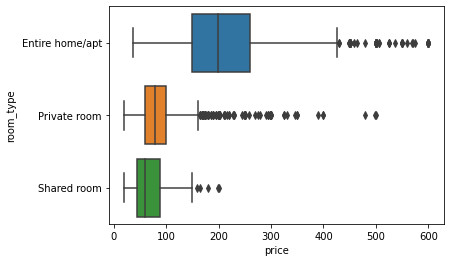

In [75]:
# take a look at the box plot
sns.boxplot(y='room_type', x='price', data=df_lis3);

# Looking at the statistics and box plot we can conclude that renring entire home/apartment increases rental price.
# Middle number, first quartile, last quartile and maximum price are higher for properties where tourists have entire home / apartment for themselves.

In [76]:
# I create simple linear model to check the impact of each room type category on price
collist = list(df_m.columns[df_m.columns.str.contains('room_type')])

X = df_m[collist]#Create X using explanatory variables from df_m (cleaned and with dummies for categorical variables)
y = df_m['price']#Create y using the response variable of price from df_m

# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.30, random_state=42)

# Initiate model
lm_room = LinearRegression(normalize=True)

# Fit model
lm_room.fit(X_train, y_train)

#Predictions for test and train sets
y_test_preds = lm_room.predict(X_test)
y_train_preds = lm_room.predict(X_train)

In [77]:
print(collist)
print('coefficients:', lm_room.intercept_, lm_room.coef_)

# r2 values
r2_score_test = r2_score(y_test, y_test_preds)
r2_scores_train = r2_score(y_train, y_train_preds)

print('r2_test:', r2_score_test)
print('r2_train:', r2_scores_train)

['room_type_Private room', 'room_type_Shared room']
coefficients: 216.25084745762598 [-124.52154809 -138.42392438]
r2_test: 0.39035559917276796
r2_train: 0.3677269676563919


###### Conclusion: We can conlude that renting entire apartment increases price. 

Middle number, first quartile, last quartile and maximum price are higher for properties where tourists have entire home / apartment for themselves. Looking at the linear model coefficients we may say that on average private and shared room prices are 125 and 138 lower compared to entire home / apartment, assuming that other predictors variable are held constant.

### Second question: Which areas in Boston are most expensive?

To answear first question I will focus on neighbourhood_cleansed column. 

In [78]:
df_lis3['neighbourhood_cleansed'].unique()

array(['Roslindale', 'Jamaica Plain', 'Mission Hill',
       'Longwood Medical Area', 'Bay Village', 'Leather District',
       'Chinatown', 'North End', 'Roxbury', 'South End', 'Back Bay',
       'East Boston', 'Charlestown', 'West End', 'Beacon Hill',
       'Downtown', 'Fenway', 'Brighton', 'West Roxbury', 'Hyde Park',
       'Mattapan', 'Dorchester', 'South Boston Waterfront',
       'South Boston', 'Allston'], dtype=object)

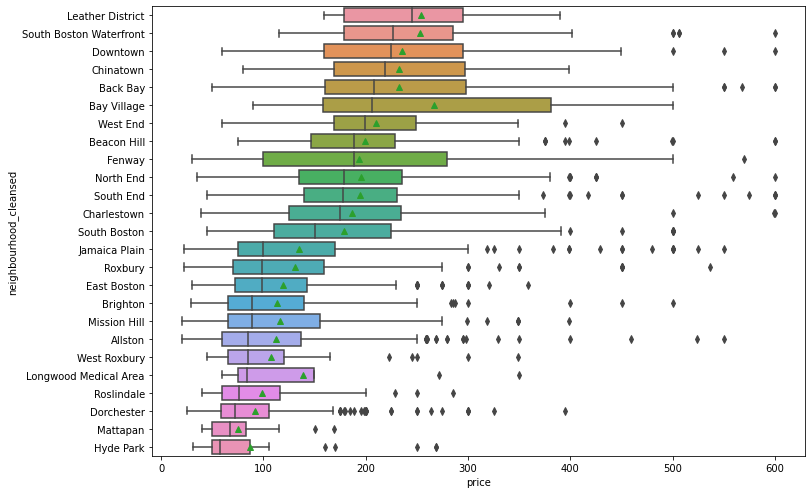

In [79]:
# take a look at the box plot
from matplotlib import rcParams

loc_order = df_lis3[['price', 'neighbourhood_cleansed']].groupby('neighbourhood_cleansed').median()\
        .sort_values(by = 'price', ascending=False).index

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

sns.boxplot(y='neighbourhood_cleansed', x='price', data=df_lis3, order = loc_order, showmeans=True);

#According to boxplot 6 top most expensive locations are: Leather District, Downtown, South Boston Waterfron, Chinatown , Back bay and Bay Village, 
# looking at the average price and the middle price. 

In [80]:
# I create simple linear model to check the impact of each location category on price
collist = list(df_m.columns[df_m.columns.str.contains('neighbourhood_cleansed')])

X = df_m[collist]#Create X using explanatory variables from df_m (cleaned and with dummies for categorical variables)
y = df_m['price']#Create y using the response variable of price from df_m

# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.30, random_state=42)

# Initiate model
lm_loc = LinearRegression(normalize=True)

# Fit model
lm_loc.fit(X_train, y_train)

#Predictions for test and train sets
y_test_preds = lm_loc.predict(X_test)
y_train_preds = lm_loc.predict(X_train)

In [81]:
# r2 values
r2_score_test = r2_score(y_test, y_test_preds)
r2_scores_train = r2_score(y_train, y_train_preds)

print('r2_test:', r2_score_test)
print('r2_train:', r2_scores_train)

r2_test: 0.24721009670648242
r2_train: 0.24598848031031106


In [82]:
# Check positive factors. Impact of each location will be in comparison to Allston location.

# Create df with column name and coefficient
df_coef = pd.DataFrame()
df_coef['factor'] = X_train.columns
df_coef['coef'] = lm_loc.coef_
df_coef.sort_values(by='coef', ascending = False)

,factor,coef
12,neighbourhood_cleansed_Leather District,227.034759
20,neighbourhood_cleansed_South Boston Waterfront,146.641902
1,neighbourhood_cleansed_Bay Village,134.659759
0,neighbourhood_cleansed_Back Bay,119.037042
7,neighbourhood_cleansed_Downtown,111.355898
5,neighbourhood_cleansed_Chinatown,100.969542
22,neighbourhood_cleansed_West End,100.597259
2,neighbourhood_cleansed_Beacon Hill,87.137813
9,neighbourhood_cleansed_Fenway,79.815712
4,neighbourhood_cleansed_Charlestown,78.602327


###### Conclusion: We can conlude that the price varies according to location.

According to the boxplot Leather District, Downtown, South Boston Waterfron, Chinatown , Back bay and Bay Village loctions 
are top 6 most expensive locations (looking at the average price and the middle price). 

Results from the linear regression model, coefficient comparison, indcate that in comparison to Allston location, Leather District, South Boston Waterfron, Bay Village, Back Bay, Downtown and Chinatown are most lucrative locations (the same as locations from boxplot analysis).


### Third question: Which factors influence property price in Boston the most?

In [83]:
# code shared by Udacity 


def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc='upper left')
        plt.show()

    best_cutoff = max(results, key=results.get)


    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)
    
    print('best_cutoff:', best_cutoff)
    print('num_feats:', num_feats)
    print('r2_scores_test:', r2_scores_test)
    print('r2_scores_train:', r2_scores_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test


In [84]:
X = df_m.drop('price', axis = 1)
y = df_m['price']
cutoffs = [5000, 2500, 1000, 100, 50, 30, 25, 10, 5, 1, 0]

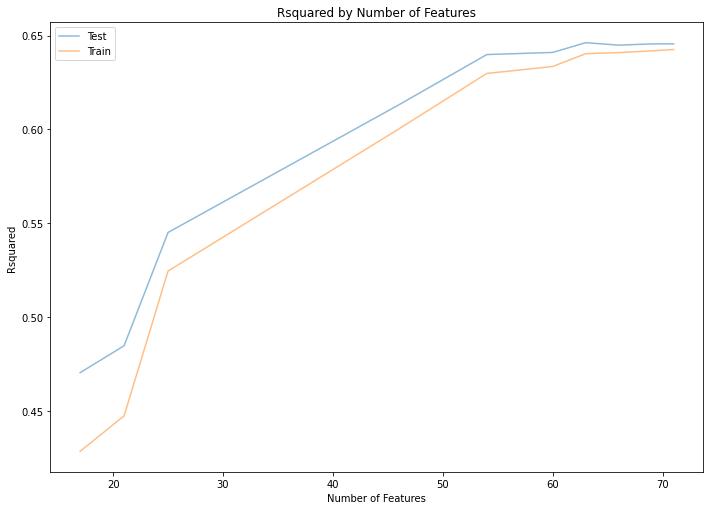

best_cutoff: 10
num_feats: [17, 21, 25, 46, 54, 60, 60, 63, 66, 69, 71, 63]
r2_scores_test: [0.4704494702161379, 0.48481036026700874, 0.545116722705864, 0.6130909684002016, 0.6398478470530592, 0.6409891424418905, 0.6409891424418905, 0.6461798525581537, 0.6448714755686633, 0.645517226536008, 0.6455459425999103]
r2_scores_train: [0.42855792006828153, 0.44746780635070327, 0.5245738495698985, 0.6002629810558748, 0.6297941689522508, 0.6335020683975052, 0.6335020683975052, 0.6403210319288134, 0.640885923848989, 0.641812796735447, 0.6425450837144889]


In [85]:
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs);

In [86]:
max(r2_scores_test)

# The best model is with 66 features

0.6461798525581537

In [87]:
# Check which factors infuence property price most, I will check 20 top factors
# code shared by Udacity 

def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)



In [88]:
coef_df.head(20)

,est_int,coefs,abs_coefs
45,neighbourhood_cleansed_South Boston Waterfront,92.944361,92.944361
28,neighbourhood_cleansed_Bay Village,91.688117,91.688117
27,neighbourhood_cleansed_Back Bay,77.673187,77.673187
50,property_type_Boat,74.383380,74.383380
56,room_type_Shared room,-70.534571,70.534571
29,neighbourhood_cleansed_Beacon Hill,70.510571,70.510571
34,neighbourhood_cleansed_Downtown,67.731080,67.731080
55,room_type_Private room,-53.903824,53.903824
36,neighbourhood_cleansed_Fenway,50.170270,50.170270
46,neighbourhood_cleansed_South End,49.201588,49.201588


###### Conclusion: Among top 20 features which infuence the price the most are: property type, location, room type and number of bedrooms.

According to linear model results positive impact on property price has property type 'Boat', comparing to property type 'Apartment' That seems relevant for me as living on a boat may be interesting fot travelers. 

Shared rooms and private rooms are less prifitable than renting entire home, which is sensible as travelers have more privacy renting entire room / apartment and if you are travelling with friends it is more convenient to rent entire home or apartment. This is consistent with the analysis results from question 1.

Regarding neighbourhood top 6 locations which have positive impact on price have South Boston Waterfron, Back bay, Bay Village, Bacon Hill, Downtown and Fenway (in comparison to Allston location). 4 of above locations were considered as 6 top locations in question 2.

Number of bedrooms also impact price of property on AIRbnb platform positively. If we rent a property with one additional bedroom we can expect the rental price to be approximately 36 dollars higher. 

Most negative impact on price have private and shared rooms, when comparing to renting entire property. 

It is not profitable to rent a property in Roslindale, Hyde Park and West Roxbury comparing to Allston location.